<a href="https://colab.research.google.com/github/park-geun-hyeong/RNN_PRACTICE/blob/main/Naver_shopping_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 44.5MB/s 
     |████████████████████████████████| 460kB 35.6MB/s 
     |████████████████████████████████| 92kB 11.5MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-02-19 16:32:18--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.g

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7fd649814588>)

In [4]:
total_data=pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
total_data.head()

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [5]:
total_data.shape

(200000, 2)

In [6]:
total_data.isna().sum()

ratings    0
reviews    0
dtype: int64

In [7]:
total_data['reviews'].nunique()

199908

In [8]:
total_data['ratings'].value_counts()

5    81177
2    63989
1    36048
4    18786
Name: ratings, dtype: int64

In [9]:
total_data['label'] = np.select([total_data.ratings > 3],[1], default = 0)

In [10]:
total_data.head()

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [11]:
total_data.drop_duplicates(subset=['reviews'],inplace=True)

In [12]:
total_data.shape

(199908, 3)

In [13]:
train, test =train_test_split(total_data, test_size=0.25, random_state=42)
train.shape, test.shape

((149931, 3), (49977, 3))

1    75013
0    74918
Name: label, dtype: int64


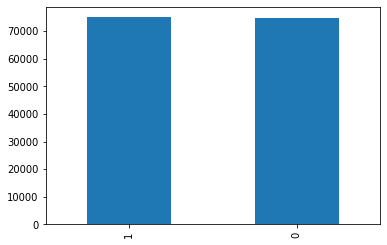

In [14]:
train['label'].value_counts().plot(kind='bar')
print(train['label'].value_counts(
))

In [15]:
train['reviews'] = train['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
train['reviews'].replace('', np.nan, inplace=True)
train.isna().sum()

ratings    0
reviews    0
label      0
dtype: int64

In [16]:
train.head()

,ratings,reviews,label
59666,2,사이즈를 센치씩 늘린건데도 작아요 그리고 색상은 완전 달라요 칙칙한핑크네요ㅠㅠ 많이...,0
12433,2,ㅂ불만족 빗이 아픔 멍이피부에 빗질못해주겟네요,0
146516,1,이 제품쓰고 삼일만에 변기물이 잘 안내려갔어요 혹시나해서 다시 빼보니 물이 다시 잘...,0
158109,5,적당하고 만족합니다,1
70219,2,편하자고 이용하는 밀키튼데 손 은근 많이 가서 저는 패쓰요,0


In [17]:
test['reviews'] = test['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
test['reviews'].replace('', np.nan, inplace=True)
test.isna().sum()

ratings    0
reviews    0
label      0
dtype: int64

In [18]:
test.head()

,ratings,reviews,label
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0
125080,1,피부에 뾰루지가 많이 올라와요,0
122750,5,배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요,1
72927,5,재구매입니다 핏도 좋고 착용감도 좋습니다,1
83890,1,파손제품 온거 출장같다 오늘 받았는데 현재상황 장난하시는지 택배회사 항의하세요,0


In [19]:
train.shape, test.shape

((149931, 3), (49977, 3))

In [20]:
mecab=Mecab()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [21]:
train['tokenize'] = train['reviews'].apply(mecab.morphs)

In [22]:
train['tokenize'] = train['tokenize'].apply(lambda x : [item for item in x if not item in stopwords])

In [23]:
train.head()

,ratings,reviews,label,tokenize
59666,2,사이즈를 센치씩 늘린건데도 작아요 그리고 색상은 완전 달라요 칙칙한핑크네요ㅠㅠ 많이...,0,"[사이즈, 센치, 씩, 늘린, 건데, 작, 아요, 그리고, 색상, 완전, 달라요, ..."
12433,2,ㅂ불만족 빗이 아픔 멍이피부에 빗질못해주겟네요,0,"[ㅂ, 불, 만족, 빗이, 아픔, 멍, 피부, 빗, 질, 못해, 주, 겟, 네요]"
146516,1,이 제품쓰고 삼일만에 변기물이 잘 안내려갔어요 혹시나해서 다시 빼보니 물이 다시 잘...,0,"[제품, 쓰, 삼, 일, 만, 변기, 물, 잘, 안, 내려갔, 어요, 혹시나, 해서..."
158109,5,적당하고 만족합니다,1,"[적당, 만족, 합니다]"
70219,2,편하자고 이용하는 밀키튼데 손 은근 많이 가서 저는 패쓰요,0,"[편하, 자고, 이용, 밀키, 튼, 데, 손, 은근, 많이, 서, 저, 패, 쓰, 요]"


In [24]:
test['tokenize'] = test['reviews'].apply(mecab.morphs)
test['tokenize'] = test['tokenize'].apply(lambda x : [word for word in x if not word in stopwords])

In [25]:
test.head()

,ratings,reviews,label,tokenize
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0,"[너무, 낮, 솜, 적, 실망, 스럽, 습니다]"
125080,1,피부에 뾰루지가 많이 올라와요,0,"[피부, 뾰루지, 많이, 올라, 와요]"
122750,5,배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요,1,"[배송, 빠르, 네요, 가격, 대비, 좋, 것, 같, 아요, 첨, 힘들, 어, 하나..."
72927,5,재구매입니다 핏도 좋고 착용감도 좋습니다,1,"[재, 구매, 입니다, 핏, 좋, 착용감, 좋, 습니다]"
83890,1,파손제품 온거 출장같다 오늘 받았는데 현재상황 장난하시는지 택배회사 항의하세요,0,"[파손, 제품, 온, 거, 출장, 같, 오늘, 받, 았, 는데, 현재, 상황, 장난..."


In [26]:
negative_words = np.hstack(train[train['label']==0]['tokenize'].values)
positive_words = np.hstack(train[train['label']==1]['tokenize'].values)

In [27]:
nagative_words_cnt= Counter(negative_words)
positive_words_cnt= Counter(positive_words)


In [28]:
nagative_words_cnt.most_common(5)


[('네요', 31799), ('는데', 20295), ('안', 19718), ('어요', 14849), ('있', 13200)]

In [29]:
positive_words_cnt.most_common(5)

[('좋', 39488), ('아요', 21184), ('네요', 19895), ('어요', 18686), ('잘', 18602)]

Text(0.5, 1.0, 'positive reiview len')

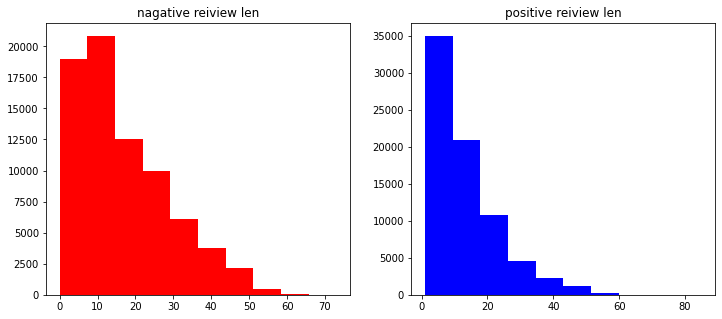

In [30]:
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))
text_len1 = train[train['label']==0]['tokenize'].map(lambda x : len(x))
ax1.hist(text_len1, color='red')
ax1.set_title("nagative reiview len")

text_len2 = train[train['label']==1]['tokenize'].map(lambda x : len(x))
ax2.hist(text_len2, color='blue')
ax2.set_title("positive reiview len")

In [31]:
x_train= train['tokenize'].values
x_test= test['tokenize'].values
y_train= train['label'].values
y_test= test['label'].values

x_train.shape,y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

In [32]:
tk=Tokenizer()
tk.fit_on_texts(x_train)


In [33]:
len(tk.word_index)

39998

In [34]:
total_size= len(tk.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tk.word_counts.items():
    total_freq += value

    if value < 2:
        rare_cnt += 1
        rare_freq += value

print("전체 단어의 개수: {}".format(total_size))
print("길이가 1개 이하인 단어의 개수: {}".format(rare_cnt))
print("작읜 단어의 개수 비율: {}".format((rare_cnt/total_size)*100))
print("작은 단어가 총 쓰인 비율: {}".format((rare_freq/total_freq)*100))     # 사이즈가 1 이하인 단어들은 개수 비율이 높은것에 비해서 사용비율은 낮다.(제거 가능 )

전체 단어의 개수: 39998
길이가 1개 이하인 단어의 개수: 18213
작읜 단어의 개수 비율: 45.53477673883694
작은 단어가 총 쓰인 비율: 0.793569529160946


In [35]:
vocab_size = total_size-rare_cnt +2 
tk = Tokenizer( num_words = vocab_size, oov_token='OOV') #OOV는 1로 tokenize 되어진다.
tk.fit_on_texts(x_train)
tk.fit_on_texts(x_test)
x_train_token = tk.texts_to_sequences(x_train)
x_test_token = tk.texts_to_sequences(x_test)


In [36]:
print(max(len(i) for i in x_train_token))

85


(array([3.830e+02, 3.073e+03, 3.225e+03, 7.461e+03, 6.268e+03, 2.468e+03,
        4.020e+03, 3.242e+03, 1.421e+03, 2.411e+03, 2.052e+03, 9.740e+02,
        1.858e+03, 8.550e+02, 1.517e+03, 1.332e+03, 5.950e+02, 1.069e+03,
        9.510e+02, 4.450e+02, 7.930e+02, 7.490e+02, 3.110e+02, 5.060e+02,
        2.470e+02, 4.540e+02, 3.350e+02, 1.430e+02, 2.700e+02, 1.990e+02,
        8.500e+01, 1.070e+02, 9.400e+01, 2.000e+01, 2.100e+01, 1.000e+01,
        2.000e+00, 5.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  2.64,  4.28,  5.92,  7.56,  9.2 , 10.84, 12.48, 14.12,
        15.76, 17.4 , 19.04, 20.68, 22.32, 23.96, 25.6 , 27.24, 28.88,
        30.52, 32.16, 33.8 , 35.44, 37.08, 38.72, 40.36, 42.  , 43.64,
        45.28, 46.92, 48.56, 50.2 , 51.84, 53.48, 55.12, 56.76, 58.4 ,
        60.04, 61.68, 63.32, 64.96, 66.6 , 68.24, 69.88, 71.52, 73.16,
        74.8 , 76.44,

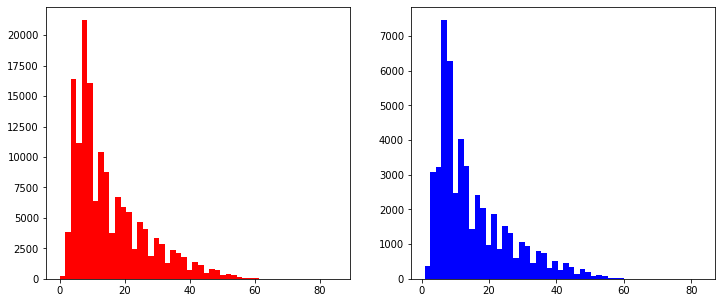

In [37]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(12,5))


ax1.hist([len(i) for i in x_train_token], color='red',bins=50)
ax2.hist([len(i) for i in x_test_token],color='blue', bins=50)

In [38]:
x_train_pad = pad_sequences(x_train_token, maxlen=80)
x_test_pad = pad_sequences(x_test_token, maxlen=80)

In [40]:
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [41]:
model=Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [43]:
es= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc= ModelCheckpoint("best_model.h5", monitor='val_acc', mode='max',verbose=1, save_best_only=True)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2178700   
_________________________________________________________________
gru (GRU)                    (None, 128)               88320     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,267,149
Trainable params: 2,267,149
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train_pad, y_train, epochs=10, batch_size=64, verbose=1, callbacks=[es,mc], validation_split=0.2)

Epoch 1/10
1875/1875 [==============================] - 307s 163ms/step - loss: 0.3238 - acc: 0.8679 - val_loss: 0.2305 - val_acc: 0.9159

Epoch 00001: val_acc improved from -inf to 0.91593, saving model to best_model.h5
Epoch 2/10
1875/1875 [==============================] - 311s 166ms/step - loss: 0.1931 - acc: 0.9322 - val_loss: 0.2193 - val_acc: 0.9192

Epoch 00002: val_acc improved from 0.91593 to 0.91923, saving model to best_model.h5
Epoch 3/10
1875/1875 [==============================] - 309s 165ms/step - loss: 0.1563 - acc: 0.9454 - val_loss: 0.2339 - val_acc: 0.9157

Epoch 00003: val_acc did not improve from 0.91923
Epoch 4/10
1875/1875 [==============================] - 309s 165ms/step - loss: 0.1282 - acc: 0.9552 - val_loss: 0.2454 - val_acc: 0.9156

Epoch 00004: val_acc did not improve from 0.91923
Epoch 5/10
1875/1875 [==============================] - 308s 164ms/step - loss: 0.1077 - acc: 0.9618 - val_loss: 0.2832 - val_acc: 0.9099

Epoch 00005: val_acc did not improve f

In [46]:
loaded_model=load_model('best_model.h5')
print(model.evaluate(x_test_pad, y_test)[1])

1562/1562 [==============================] - 32s 21ms/step - loss: 0.3063 - acc: 0.9101
0.910098671913147


In [52]:
def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tk.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = 80) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [53]:
sentiment_predict("아 정말 싼티나서 짜증이나네요...")

95.73% 확률로 부정 리뷰입니다.


In [54]:
sentiment_predict("핏도 좋고 가볍고 색도이뻐서 자주 입고다닐것 같아요")

97.45% 확률로 긍정 리뷰입니다.
